In [2]:
import os 
os. environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import random     #随机梯度下降
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples):   
    
    x = torch.normal(0,1,(num_examples, len(w)))   #均值为0， 方差为1 ， 样本数，列长度为w的长度
    y = torch.matmul(x,w) + b  # wx + b
    y += torch.normal(0, 0.01, y.shape)   #随机噪音
    
    return x , y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features , labels = synthetic_data(true_w , true_b , 1000)

In [4]:
print('features:', features[0],'\nlabel:',labels[0])

features: tensor([-0.1987, -1.7043]) 
label: tensor([9.6079])


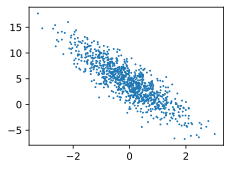

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1)


In [15]:
#定义一个函数，接收批量大小，特征矩阵和标签向量作为输入， 生成大小为batch_size的小批量

def data_iter(batch_size, features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 打乱下标
    
    for i in range(0,num_examples,batch_size):   # 0～样本数量， 每次batch_size个大小
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]   #产生随机顺序的特征和标签

batch_size = 10

for x, y in data_iter(batch_size,features , labels):
    print(x,'\n',y)
    break

tensor([[-2.3525e+00,  1.4698e-03],
        [-9.4087e-01,  3.0182e-01],
        [ 5.8428e-01,  1.1008e+00],
        [ 1.3778e-02,  8.9648e-02],
        [-5.4682e-01, -3.3804e-01],
        [-7.8300e-01, -1.3470e+00],
        [-6.1213e-01,  8.3888e-01],
        [-7.7779e-01,  7.7450e-03],
        [-1.1935e+00, -4.6007e-01],
        [-2.0860e+00,  4.7719e-01]]) 
 tensor([[-0.5078],
        [ 1.3014],
        [ 1.6206],
        [ 3.9207],
        [ 4.2517],
        [ 7.2041],
        [ 0.1130],
        [ 2.6033],
        [ 3.3652],
        [-1.5917]])


In [17]:
#定义初始化模型参数
w = torch.normal(0,0.01,size=(2,1),requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [18]:
#定义模型
def linreg(x,w,b):
    return torch.matmul(x,w)+b

In [19]:
#定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2     #均方损失

In [26]:
#定义优化算法
def sgd(params, lr, batch_size):    #小批量梯度下降 ,lr是学习率
    with torch.no_grad():           #更新的时候不参与梯度计算
        for param in params:        
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            

In [31]:
#训练过程

lr = 0.01
num_epochs = 10   #整个数据扫三遍， 每次取10个样本训练
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,features,labels):
        l = loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b] , lr, batch_size)
    with torch.no_grad():
        train_1 = loss(net(features, w , b), labels)
        print(f'epoch{epoch+1},loss{float(train_1.mean()):f}')

epoch1,loss0.000049
epoch2,loss0.000049
epoch3,loss0.000049
epoch4,loss0.000049
epoch5,loss0.000049
epoch6,loss0.000049
epoch7,loss0.000049
epoch8,loss0.000049
epoch9,loss0.000049
epoch10,loss0.000049


In [30]:
#比较真实参数和通过训练学到的参数用来评估训练的成功程度
print(f'W的估计误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

W的估计误差:tensor([-7.0310e-04, -3.9339e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0004], grad_fn=<RsubBackward1>)
